In [38]:
#載入所需函示庫

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels
import math

In [28]:
def residual_analysis(a):
    #Histogram
    _ = plt.hist(a.resid_pearson, bins = 'auto')
    plt.title('Histogram')
    plt.show()
    
    #Histogram
    fig = sm.qqplot(a.resid_pearson, stats.norm, fit=True, line='45')
    plt.title('Q-Q Plot')
    plt.show()
    
    #Heteroscedasticity and Homoscedasticity
    st, data, ss2 = sso.summary_table(a, alpha=0.05)
    #Predicted value
    x = data[:, 2]
    #Residual
    y = data[:, 8]
    _ = plt.plot(x, y, 'o', color = 'b')
    plt.title('Heteroscedasticity and Homoscedasticity')
    plt.xlabel('Predicted Value')
    plt.ylabel('Residual')
    plt.show()
    
    #Outliers
    st, data, ss2 = sso.summary_table(a, alpha=0.05)
    #Predicted value
    x = data[:, 2]
    #Studentized Residual
    y = data[:, 10]
    plt.plot(x, y, 'o', color = 'gray')
    plt.title('Outliers')
    plt.axhline(y=2, color = 'red', lw = 0.8)
    plt.axhline(y=-2, color = 'red', lw = 0.8)
    plt.show()
    
    #Influential Observations
    x = data[:, 2]
    cook_dist = data[:, 11]
    plt.plot(x, cook_dist, 'o', color = 'gray')
    plt.title("Cook's Distance")
    plt.show()

## DSAP 107

### 影片長度與觀看倍數 (square)

In [29]:
df1 = pd.read_excel('dsap107_videoLenVs_0614.xlsx')

print('Head of dataset:')
display(df1.head())

print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,video_id,len,avg_pause_cnt,avg_freq,avg_playback_rate
0,4607,945,5.323810,0.966410,1.494205
1,4581,743,3.019048,0.906159,1.536652
2,4582,728,3.647619,0.935309,1.546589
3,4585,1061,18.723810,1.097114,1.465569
4,4586,920,11.371429,1.159451,1.446708


Tail of dataset:


,video_id,len,avg_pause_cnt,avg_freq,avg_playback_rate
51,5594,800,3.523810,0.728774,1.519731
52,5595,374,1.885714,0.518742,1.482642
53,5596,526,2.828571,0.569708,1.480265
54,5597,343,1.476190,0.463057,1.464029
55,5964,1012,0.000000,0.000000,0.000000


In [30]:
df1 = df1.replace(0, np.nan)
df1 = df1.dropna()
df1.describe()

,video_id,len,avg_pause_cnt,avg_freq,avg_playback_rate
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,4991.740741,629.555556,4.221517,0.820895,1.521305
std,458.497636,191.789553,3.784116,0.285548,0.038130
min,4581.000000,114.000000,0.714286,0.325822,1.385964
25%,4600.250000,488.750000,1.454762,0.523542,1.501246
50%,4618.500000,602.000000,2.800000,0.915822,1.525075
75%,5449.750000,779.250000,6.190476,1.082457,1.544706
max,5597.000000,1061.000000,18.723810,1.252233,1.599311


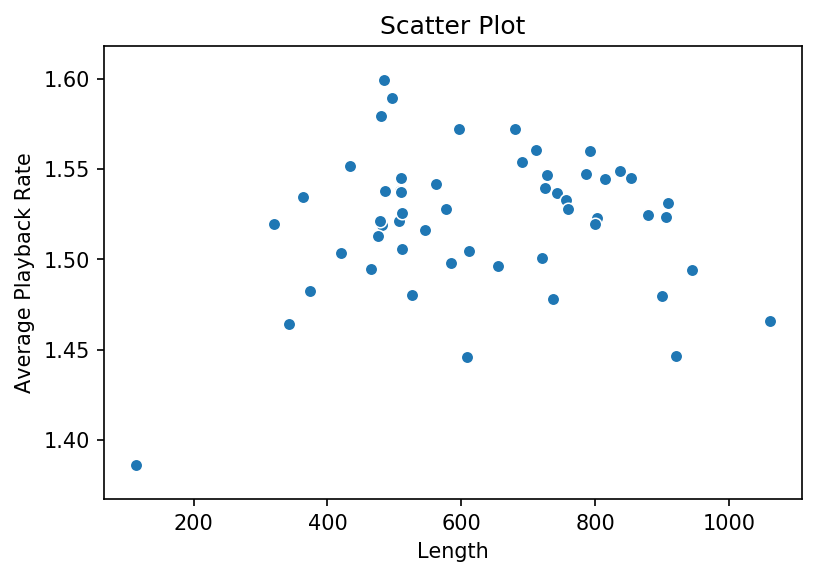

In [31]:
sns.scatterplot(x = df1['len'], y = df1['avg_playback_rate'])

plt.title('Scatter Plot')
plt.xlabel('Length')
plt.ylabel('Average Playback Rate')
plt.show()

In [32]:
df1['sq_len'] = df1['len']*df1['len']

In [33]:
# Fit regression model 
df1_result = smf.ols('avg_playback_rate ~ len + sq_len', data=df1).fit()

# Inspect the results
print(df1_result.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_playback_rate   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     12.65
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           3.46e-05
Time:                        14:56:49   Log-Likelihood:                 111.16
No. Observations:                  54   AIC:                            -216.3
Df Residuals:                      51   BIC:                            -210.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3449      0.036     36.981      0.0

### Residual Analysis

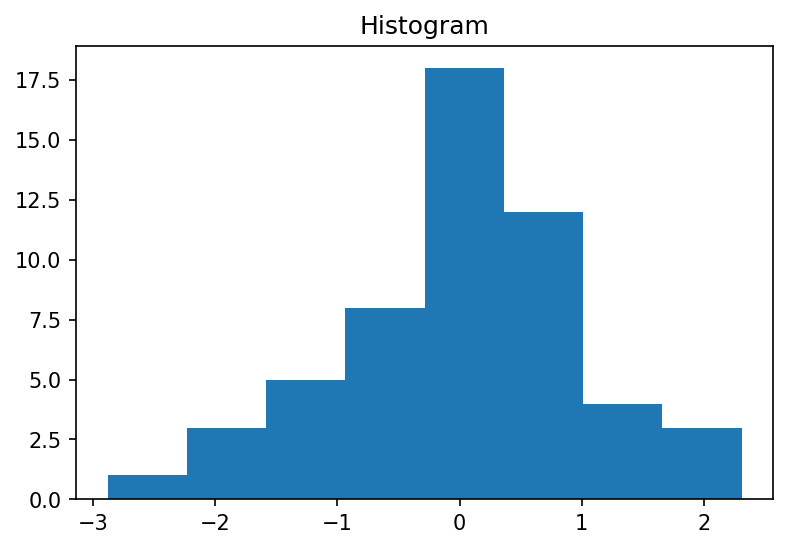

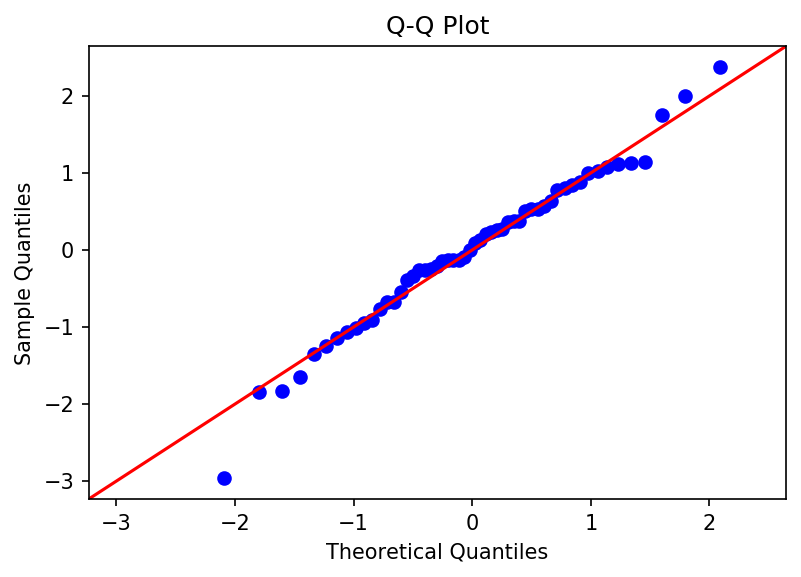

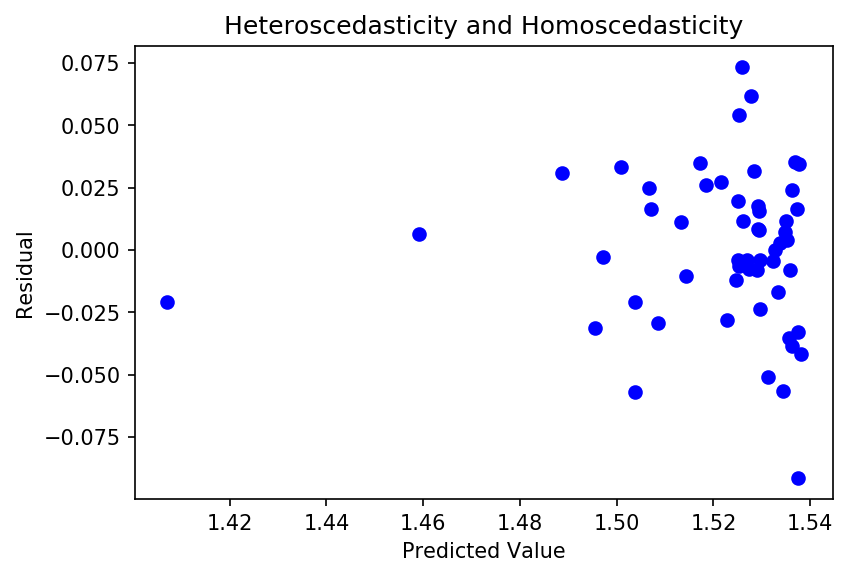

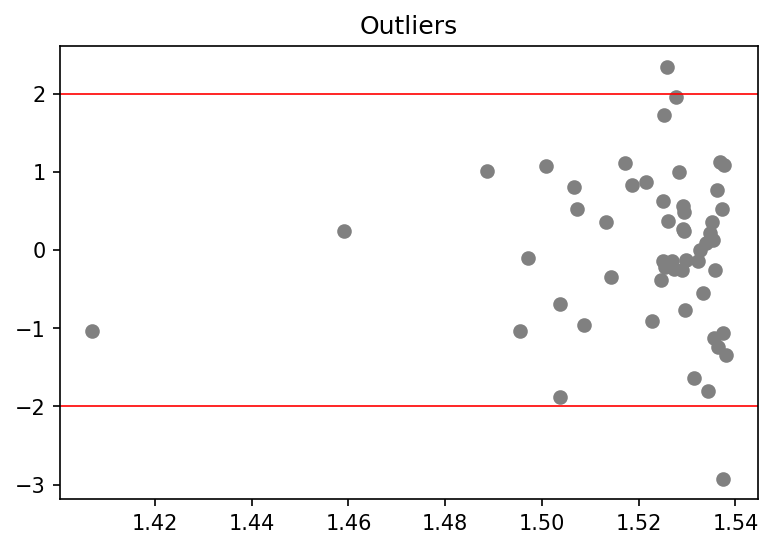

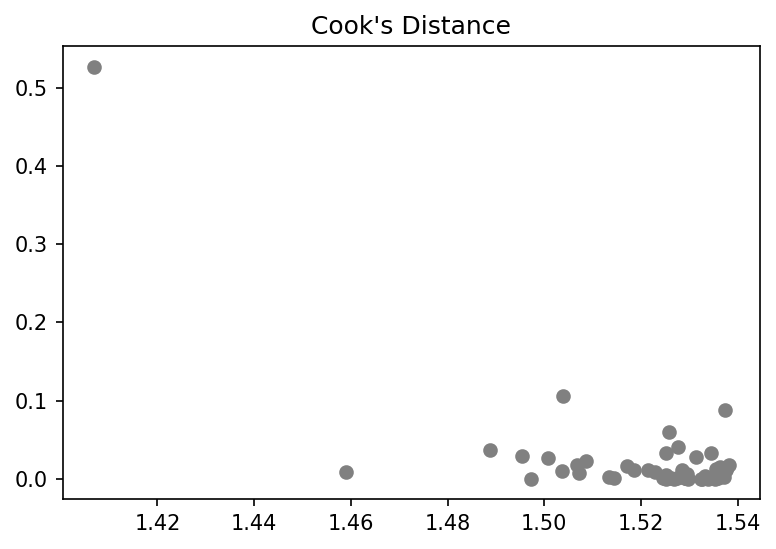

In [34]:
residual_analysis(df1_result)

### Checking Normality Assumption

Shapiro Test <br>
H0 : The data is normally distributed. <br>
H1 : The data is not normally distributed.

In [35]:
stat, p = stats.shapiro(df1_result.resid_pearson)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.986, p=0.796


Histogram and Q-Q plot look OK. Because the testing result of Shapiro-Wilk test shows that p_value = 0.796 > 0.05, there is no sufficient evidence that the data is not normally distributed at the 5% significance level. Therefore, we conclude that the normality assumption is satisfied

### Checking Heteroscedasticity and Homoscedasticity 

There is sign for Heteroscedasticity

### Checking Residual Autocorrelation

We collect datas independently. Therefore, there will be no sign for autocorrelation

### Checking Outliers and Influential Observations

There are two outliers <br>
There is no observation with Cook’s distance > 1. Therefore, there is no significant influential observation

### 影片長度與暫停次數 (exponential)

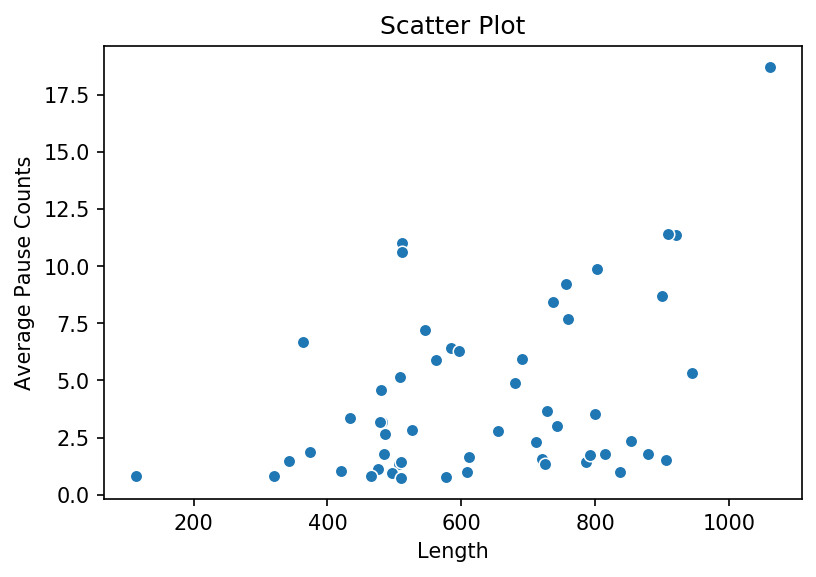

In [51]:
sns.scatterplot(x = df1['len'], y = df1['avg_pause_cnt'])

plt.title('Scatter Plot')
plt.xlabel('Length')
plt.ylabel('Average Pause Counts')
plt.show()

In [73]:
df1['exp_avg_pause_cnt'] = np.exp(df1['avg_pause_cnt'])

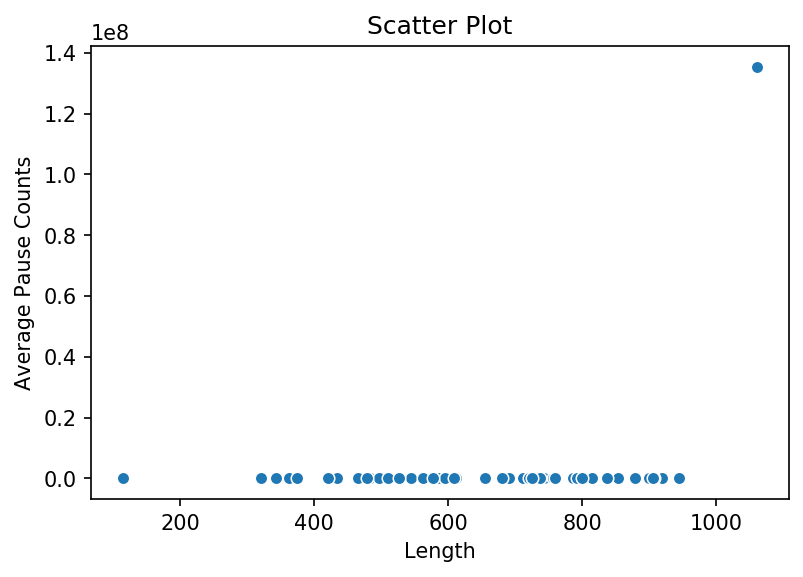

In [74]:
sns.scatterplot(x = df1['len'], y = df1['exp_avg_pause_cnt'])

plt.title('Scatter Plot')
plt.xlabel('Length')
plt.ylabel('Average Pause Counts')
plt.show()

In [75]:
# Fit regression model 
df1_result = smf.ols('exp_avg_pause_cnt ~ len', data=df1).fit()

# Inspect the results
print(df1_result.summary())

                            OLS Regression Results                            
Dep. Variable:      exp_avg_pause_cnt   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     5.614
Date:                Mon, 22 Jun 2020   Prob (F-statistic):             0.0216
Time:                        15:46:33   Log-Likelihood:                -976.73
No. Observations:                  54   AIC:                             1957.
Df Residuals:                      52   BIC:                             1961.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.637e+07   8.32e+06     -1.966      0.0

### Residual Analysis

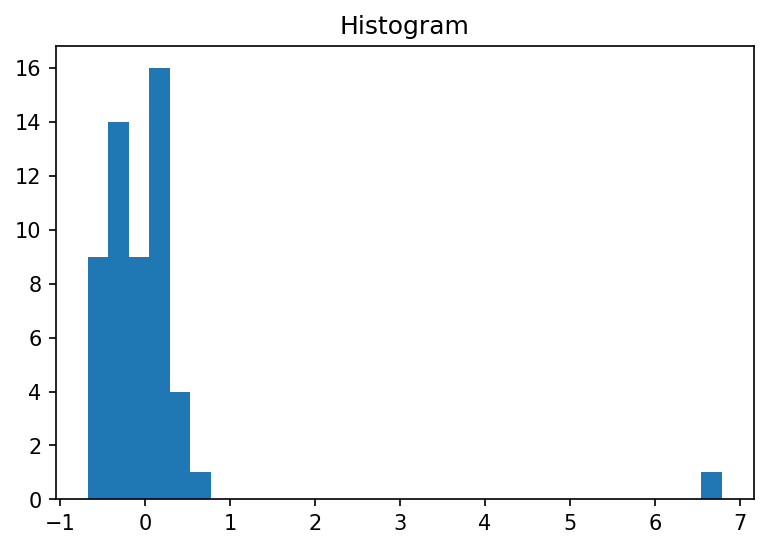

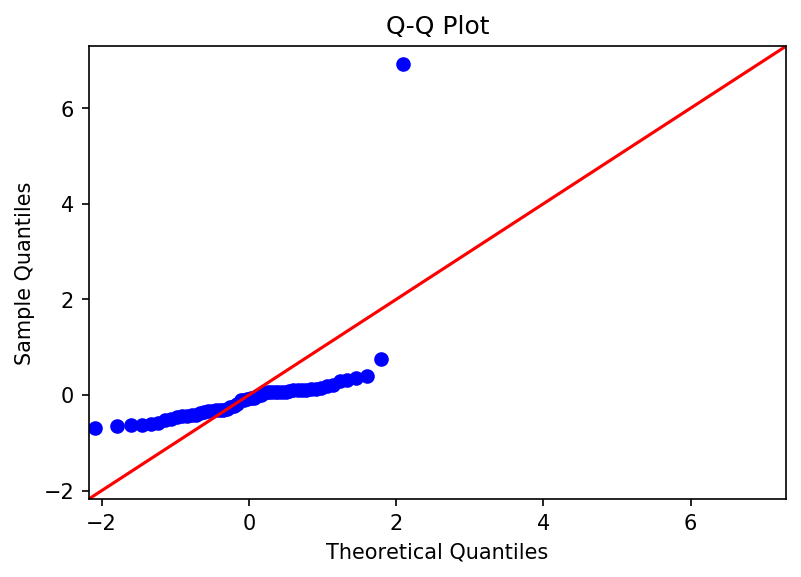

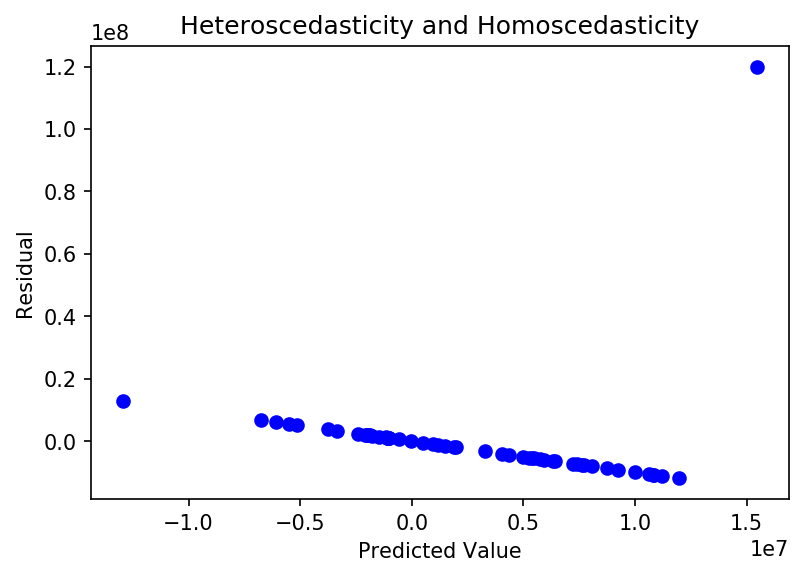

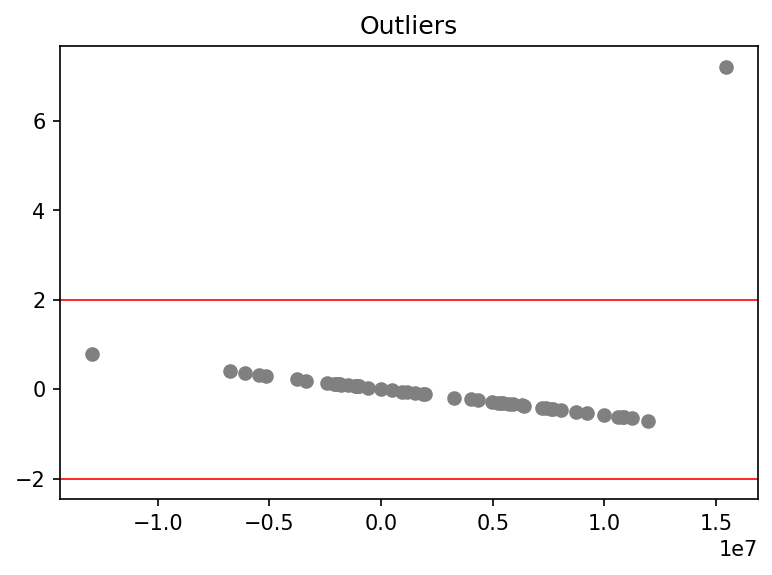

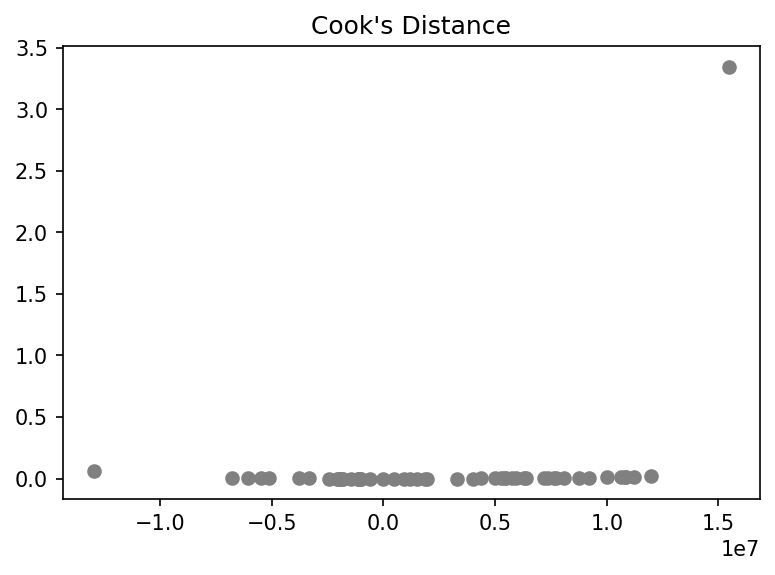

In [76]:
residual_analysis(df1_result)

### Checking Normality Assumption

Shapiro Test <br>
H0 : The data is normally distributed. <br>
H1 : The data is not normally distributed.

In [77]:
stat, p = stats.shapiro(df1_result.resid_pearson)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.376, p=0.000


Histogram and Q-Q plot look OK. Because the testing result of Shapiro-Wilk test shows that p_value = 0.000 < 0.05, there is sufficient evidence that the data is not normally distributed at the 5% significance level. Therefore, we conclude that the normality assumption is not satisfied

### Checking Heteroscedasticity and Homoscedasticity 

There is no sign for Heteroscedasticity

### Checking Residual Autocorrelation

We collect datas independently. Therefore, there will be no sign for autocorrelation

### Checking Outliers and Influential Observations

There is one outlier <br>
There is one observation with Cook’s distance > 1. Therefore, there is one significant influential observation